### Eager execution
Tensorflow 2.0에 맞게 다시 Tensorflow를 살펴볼 필요가 있다고 느껴져서 <a href="https://www.tensorflow.org/?hl=ko">Tensorflow 정식 홈페이지</a>에 나와있는 예제부터 전반적인 Tensorflow 사용법을 먼저 익히는 Post가 된다.  
<br>

#### 필요한 Library Import

In [93]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import time
import cProfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib

### Eager execution
Code 참조: <a href="https://www.tensorflow.org/guide/eager">Tensorflow Core Eager execution</a>
<br>

#### What is Eager execution
**Eager execution**은 imperative programing(명령형 프로그래밍) environment이다.  
즉, Graph를 Define하고 RUN하기 전에 계산된 Value를 확인할 수 있는 환경인 것 이다.  
Pytorch와 Tensorflow를 비교한 Post <a href="https://wjddyd66.github.io/pytorch/Pytorch-Basic/">Pytorch-Basic</a>를 살펴보게 되면 Tensorflow 는 static Graph(Define and RUN), Pytorch는 dynamic Graph(Define by RUN)라고 설명하였다.  
따라서 Pytorch의 경우에는 Graph를 돌리기 이전에 값을 확인하면서 사용자가 좀 더 쉽게 Debugging이 가능했던 이점을 Tensorflow 2.0에서는 Eager execution을 통하여 지원하는 모습이다.  

이러한 **Eager execution**의 기능을 Tensorflow 2.0에서는 다음과 같이 설명하고 있다.  
>1. An intuitive interface—Structure your code naturally and use Python data structures. Quickly iterate on small models and small data.
2. Easier debugging—Call ops directly to inspect running models and test changes. Use standard Python debugging tools for immediate error reporting.
3. Natural control flow—Use Python control flow instead of graph control flow, simplifying the specification of dynamic models.
>

1. Intuitive Interface: Python의 data Stucture를 사용가능하다.
2. Easier debugging: Running중인 Model을 검토하거나 변경사항을 테스트하기 위하여 연산을 직접 호출하여 값을 확인 가능하다.(이전 Post에서 <code>.numpy()</code>를 통하여 값을 확인하면서 Data Pipeline을 잘 설정하였는지 확인하였다.)
3. Natural control flow:Python의 control flow를 사용함으로 인하여 Tensorflow의 Graphic flow가 아니여서 사용자가 친숙하게 사용할 수 있다. (이전에서 Python의 Function을 설정하여 <code>@tf.function</code>을 통하여 Tensorflow Graph에서 사용가능하게 변경하거나 Tensor를 <code>.numpy()</code>로서 Numpy로 바꾸고 Function에서 연산처리를 하였다.)

기본적으로 Tensorflow 2.0의 eager execution이 가능한지는 <code>tf.executing_eagerly()</code>로서 확인 가능하다.

In [94]:
tf.executing_eagerly()

True

#### Easier debugging
위에서 Running중인 Model을 검토하거나 변경사항을 테스트하기 위하여 연산을 직접 호출하여 값을 확인하는 것이 가능하다고 하였다.  
아래 예제는 이러한 기능을 나타낸 것이다.  
주요한 점은 이러한 Tensor를 연산하거나 값을 확인하기 위하여 기본적으로 Numpy를 사용하므로 Numpy에 관한 사전지식이 필요하다는 것 이다.  

**참고사항**  
Eager execution의 기능을 제공하는 Tensor의 종류는 EagerTensor이다.  
이러한 Eager Tensor는 텐서플로 연산을 바로 평가(Intuitive Interface)하고 그 결과를 파이썬에게 알려주는 방식으로 동작을 변경한다.  
또한 이렇나 EagerTensor를 확인하기 위한 <code>print</code>나 Debugging은 Gradinet를 계산하는 흐름을 방해하지 않는다.

In [95]:
# Eager Tensor 선언 및 확인
a = tf.constant([[1, 2],
                 [3, 4]])
print(type(a))
print(a)

# 브로드캐스팅(Broadcasting) 지원
b = tf.add(a, 1)
print(b)

# 연산자 오버로딩 지원
print(a * b)

# Numpy 지원
c = np.multiply(a, b)
print(c)

# 텐서로부터 numpy 값 얻기:
print(a.numpy())

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)
[[ 2  6]
 [12 20]]
[[1 2]
 [3 4]]


#### Dynamic control flow
**Eager execution**의 가장 큰 이점은 Model이 실행하는 동안에 호스트 언어(Python)의 모든 기능을 활용할 수 있다는 것 이다.  
아래에서는 Tensor를 Python Function안에서 Numpy로서 변경하여 연산을 수행하는 과정이다.  
**Tensor값에 따라서 조건문을 실행하게 되고 실행중에 그 결과를 출력(Tensor와 연산을 확인하기 위하여 session을 열고 Run한 뒤 결과를 확인 안하여도 된다.)한다.**

In [5]:
def fizzbuzz(max_num):
    # Eager Tensor 선언
    counter = tf.constant(0)
    max_num = tf.convert_to_tensor(max_num)
    # Eager Tensor를 .numpy()를 통하여 Python의 변수로서 변경
    for num in range(1, max_num.numpy()+1):
        # num을 Eager Tensor로서 변경
        num = tf.constant(num)
        # Eager Tensor를 조건문에 활용
        if int(num % 3) == 0 and int(num % 5) == 0:
            print('FizzBuzz')
        elif int(num % 3) == 0:
            print('Fizz')
        elif int(num % 5) == 0:
            print('Buzz')
        else:
            print(num.numpy())
        counter += 1
        
fizzbuzz(15)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz


#### Computing gradients
**Automatic differentiation**은 Backpropagation수행을 하여 Weight Update시에 매우 유용하다.  
**Eager execution은 <code>tf.GradientTape</code>을 활용하여 미분을 바로 수행하게 된다.**  
주요한 점은 tape는 Forward의 모든 연산을 담고 있고 tape를 거꾸로 돌려서 Gradient를 계산하고 폐기한다. 또한 **tf.Gradient는 one gradient만 가능하고(즉, <a href="https://wjddyd66.github.io/tnesorflow2.0/Tensorflow2.0(1)/">Pix2Pix</a>에서는 Generator, Discriminator 2개의 Model이 존재하므로 tf.Gradient 2개 선언) 이를 어길시 runtime error가 발생한다.**  

위의 해결방안으로서 <code>persistent=True</code>의 Option을 주어서 여러번 tape를 호출하고 tape를 삭제하는 방법으로 구성해야 한다.

In [6]:
# Tensor 선언
w = tf.Variable([[1.0]])

# Model및 Gradient선언
with tf.GradientTape() as tape:
    loss = w * w

# Loss를 w에 대하여 미분
grad = tape.gradient(loss, w)
# 결과 확인
print(grad)

# Tensor 선언
w = tf.Variable([[3.0]])

# Model및 Gradient선언
# persistent=True Option 없을 시 Gradinet 1번 밖에 계산 안됨
with tf.GradientTape(persistent=True) as tape:
    tape.watch(w)
    loss = w * w
    loss2 = loss * loss
    

# Gradient 2번 호출
grad = tape.gradient(loss, w)
grad2 = tape.gradient(loss2, w)

# 결과 확인
print(grad)
print(grad2)

# Tape 삭제
del tape

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)
tf.Tensor([[6.]], shape=(1, 1), dtype=float32)
tf.Tensor([[108.]], shape=(1, 1), dtype=float32)


#### Train a model
**Eager execution**을 사용하여 Model을 Build하고 Training하기 전에 결과를 확인할 수 있다.

In [7]:
# 데이터셋 다운로드
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

# tf.data.Dataset Object로 변환 keras.layers.Conv2D를 위하여 tf.newaxis로서 Dimension 추가
dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
     tf.cast(mnist_labels,tf.int64)))

# Shuffle 및 batch 처리
dataset = dataset.shuffle(1000).batch(32)

# Model 선언
mnist_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16,[3,3], activation='relu',
                         input_shape=(None, None, 1)),
  tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10)
])

'''
Eager Execution을 통하여 Model 결과 확인
위에서 Dataset Pipeline으로서 Batch를 32로서 선언하였기 때문에 하나의 결과를 확인하기 위해서는
다음과 같이 images[0:1]로서 하나의 Image만은 Indexing하여 사용하여야 한다.
'''
for images,labels in dataset.take(1):
    print("Logits: ", mnist_model(images[0:1]).numpy())

Logits:  [[-0.00472712  0.00080639 -0.00118288  0.03038134  0.02856171 -0.01731389
  -0.00965177 -0.03106915  0.01488576  0.03678003]]


#### Customizing Training Step
이전 <a href="https://wjddyd66.github.io/categories/#keras">Keras 관련 Post</a>에서는 <code>model.fit()</code>을 통하여 Training Loop를 작동시켰다.  
하지만 아래 Code는 Tensorflow의 **tf.GradientTape**를 통하여 전체적인 Training과정을 선언하고 원하는 형태로 Customizing을 실시한다.  
최종적으로 BackPropagation을 실시하기 위한 과정은 다음과 같다.  

1. Optimizer(<code>tf.keras.optimizers.Adam()</code>), LossFunction(<code>tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)</code>) 선언
2. Model 결과와 Label LossFunction 계산(<code>loss_object(labels, logits)</code>)
3. Gradient 계산(<code>tape.gradient(loss_value, mnist_model.trainable_variables)</code>)
4. Weight Update(<code>optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))</code>)

<br>

**<code>tf.debugging.assert_equal</code>**: 2개의 값이 같은지 비교하는 것 이다. Python의 assert와 같은 기능을 Tensorflow Training과정에서 수행한다고 생각하면 된다.  
참조: <a href="https://www.tensorflow.org/api_docs/python/tf/debugging">tf.debugging 사용법</a><br>
참조: <a href="https://www.tensorflow.org/api_docs/python/tf/debugging/assert_equal?version=stable">tf.debugging.assert_equal 사용법</a>

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished


Text(0, 0.5, 'Loss [entropy]')

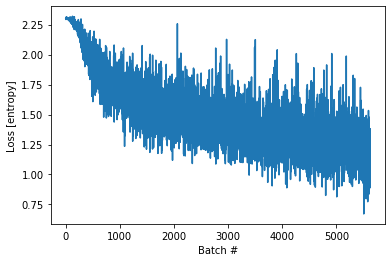

In [8]:
# Optimizer 선언
optimizer = tf.keras.optimizers.Adam()
# Loss Function 선언
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# 결과 확인을 위한 History 선언
loss_history = []

def train_step(images, labels):
    with tf.GradientTape() as tape:
        logits = mnist_model(images, training=True)
        
        # Add asserts to check the shape of the output.
        tf.debugging.assert_equal(logits.shape, (32, 10))
        loss_value = loss_object(labels, logits)
        
    loss_history.append(loss_value.numpy().mean())
    # 하나의 Backpropagation의 Set라고 생각하여도 된다. Gradient를 적용한 뒤 Backpropagation을 진행한다.
    # 주요한점은 mnist_model.trainable_variables의 변수들을 Training하는 것 이므로 Model을 선언할 때
    # Weight가 Update되지 않게 선언하면 Weight는 Training되지 않는다.
    grads = tape.gradient(loss_value, mnist_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))

# Model Training
def train(epochs):
    for epoch in range(epochs):
        for (batch, (images, labels)) in enumerate(dataset):
            train_step(images, labels)
        print ('Epoch {} finished'.format(epoch))        
train(epochs = 3)

# Loss History 시각화
plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')

#### tf.Variable
Tensorflow 1.x에서 Keras를 활용하지 않으면 하나하나의 Weight와 x, y를 <code>tf.placehoder()</code>와 같이 선언하였다.  
이러한 변수는 목적에 따라서 placeholder or constant ... 등과 같이 나타내였다.  
Tensorflow 2.0에서는 변수를 변수형 Tensor(<code>tf.Variable</code>), 상수형 Tensor로서 통일하였다.(개인적으로 가장 편리했던 점 중 하나이다.)  
위의 2개의 차이점은 매우 간단하다.
- 변수형 Tensor: Training 도중에 Update되는 값
- 상수형 Tensor: Training 도중에 Update되지 않는 값

이러한 tf.Variable은 Function을 제공하거나 <code>tf.device()</code>를 통하여 dtype에 호환되는 가장 빠른 장치에 위치하게 된다.(만약 GPU가 사용가능하면 대부분의 변수들이 GPU에 자동적으로 위치하게 된다.)  

**tf.Variable에 적용할 수 있는 함수는 매우 많기때문에 링크로서 남겨둡니다.**  
참조: <a href="https://www.tensorflow.org/api_docs/python/tf/Variable?version=stable">tf.Variable 사용법</a>

In [20]:
# 사용가능한 Device 출력
print(device_lib.list_local_devices())

# tf.Variable 선언
my_variable = tf.Variable(tf.zeros([1., 2., 3.]))

print()
# Variable GPU에 할당
with tf.device("/gpu:0"):
    v = tf.Variable(tf.zeros([10, 10]))

# tf.Variable 선언 및 연산 확인
v = tf.Variable(0.0)
w = v + 1
print(type(w))
print(w.numpy())

# tf.Variable Function 적용
v = tf.Variable(0.0)
v.assign_add(1)
print(v)

# read_value를 사용하여 현재값 확인하기
v = tf.Variable(0.0)
v.assign_add(1)
print('read_vlaue 사용',v.read_value())
print('numpy 사용',v.numpy())

# 변수 추적
class MyModuleOne(tf.Module):
    def __init__(self):
        self.v0 = tf.Variable(1.0)
        self.vs = [tf.Variable(x) for x in range(10)]
    
class MyOtherModule(tf.Module):
    def __init__(self):
        self.m = MyModuleOne()
        self.v = tf.Variable(10.0)
    
m = MyOtherModule()
print(len(m.variables))  # 12 = 1(self.v0) + 10(self.vs) + 1(self.v)


# 변수형 Tensor(tf.Variable)
s = tf.Variable(1.0)
print(type(s))

# 상수형 Tensor(Eager Tensor)
s2 = tf.ones(2,1)
print(type(s2))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9664270224173875647
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 9037400715621209074
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3306291200
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7436821505498120560
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 4826601455677778066
physical_device_desc: "device: XLA_GPU device"
]

<class 'tensorflow.python.framework.ops.EagerTensor'>
1.0
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>
read_vlaue 사용 tf.Tensor(1.0, shape=(), dtype=float32)
numpy 사용 1.0
12
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
<class 'tensorf

#### GradientTape2
위에서 <code>tf.GradientTape</code>을 활용하여 미분을 바로 수행, Weight Update가 가능한 변수형 텐서, 불가능한 상수형 Tensor가 존재한다고 하였다.  
만약 **상수형 텐서에 대해 미분하고 싶으면 <code>tape.watch()</code>함수를 사용하여 상수형 텐서를 변수형 텐서처럼 바꾸어야 한다.**

In [10]:
# 변수형 Tensor
x = tf.Variable(tf.constant(1.0))
# 상수형 Tensor
a = tf.constant(1.0)
print('tf.Variable Type ',type(x))
print('tf.constant Type ',type(a))

with tf.GradientTape() as tape:
    tape.watch(a)
    y = tf.multiply(a, x)

gradient = tape.gradient(y, a) 
print(gradient.numpy())

# 아래 처럼 상수형 Tensor에 대해서 미분을 시도하면 Error 발생
with tf.GradientTape() as tape:
    y = tf.multiply(a, x)
    
gradient = tape.gradient(y, a) 
print(gradient is None)

tf.Variable Type  <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
tf.constant Type  <class 'tensorflow.python.framework.ops.EagerTensor'>
1.0
True


#### Variables and optimizer
Tensorflow 2.0에서는 Keras를 활용하여 Model을 정의하게 된다.  
아래 Code는 Keras에서 제공하는 Model을 선언하는 것이 아닌 사용자가 원하는 Model을 선언하는 방법이고 다음과 같은 순서로 진행된다.  
**위에서 설명한 tf.Variable로서 선언하게 되면 Tensorflow의 1.x에서의 변수와 같이 Backpropagation을 쉽게 진행할 수 있다.**  

1. Model 선언(tf.keras.Model을 상속받는다.)
2. Optimizer, LossFunction선언
3. Model에서 tf.variable로 선언한 변수를 Weight Update(<code>optimizer.apply_gradients(zip(grads, [model.W, model.B]))</code>)


In [11]:
class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        self.W = tf.Variable(5., name='weight')
        self.B = tf.Variable(10., name='bias')
        
    def call(self, inputs):
        return inputs * self.W + self.B

# Dataset은 대략 y=3x+2 로서 구성
NUM_EXAMPLES = 2000
training_inputs = tf.random.normal([NUM_EXAMPLES])
noise = tf.random.normal([NUM_EXAMPLES])
training_outputs = training_inputs * 3 + 2 + noise

# 최적화할 손실함수
def loss(model, inputs, targets):
    error = model(inputs) - targets
    return tf.reduce_mean(tf.square(error))

def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return tape.gradient(loss_value, [model.W, model.B])

# 정의:
# 1. 모델
# 2. 모델 파라미터에 대한 손실 함수의 미분
# 3. 미분에 기초한 변수 업데이트 전략
model = Model()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

print("초기 손실: {:.3f}".format(loss(model, training_inputs, training_outputs)))

# 반복 훈련
for i in range(300):
    grads = grad(model, training_inputs, training_outputs)
    optimizer.apply_gradients(zip(grads, [model.W, model.B]))
    
    if i % 50 == 0:
        print("스텝 {:03d}에서 손실: {:.3f}".format(i, loss(model, training_inputs, training_outputs)))

print("최종 손실: {:.3f}".format(loss(model, training_inputs, training_outputs)))
print("W = {}, B = {}".format(model.W.numpy(), model.B.numpy()))

print('Model output(input = 1, Model=3x+2+noise)',model(1.).numpy())

초기 손실: 69.547
스텝 000에서 손실: 66.818
스텝 050에서 손실: 9.644
스텝 100에서 손실: 2.150
스텝 150에서 손실: 1.167
스텝 200에서 손실: 1.038
스텝 250에서 손실: 1.021
최종 손실: 1.019
W = 3.035815715789795, B = 2.001500368118286
Model output(input = 1, Model=3x+2+noise) 5.0373163


#### object-based saving
사용자가 Customizing한 Model또한 tf.keras.Model을 상속받아 구현한 Model이므로 Training된 Model의 Wieghts(<code>tf.Variable</code>) 저장하고 불러올 수 있다.

In [12]:
# Customizing Model의 Weights(tf.Variable) 저장 및 불러오기
model.save_weights('./Model/weights')
model = Model()
print('Not Training Model(y=3x+2+noise)',model(1.).numpy())
model.load_weights('./Model/weights')
print('Training Model(y=3x+2+noise)',model(1.).numpy())
!ls ./Model/

Not Training Model(y=3x+2+noise) 15.0
Training Model(y=3x+2+noise) 5.0373163
checkpoint		     weights.data-00000-of-00002  weights.index
weights.data-00000-of-00001  weights.data-00001-of-00002


#### Object-oriented metrics
<code>tf.keras.metrics</code>는 하나의 객체로서 사용자가 지정한 형태로의 지표로서 출력한다.  
이전 Keras에서는 <code>model.compile()</code>의 Option중 하나로서 사용하였고 아래 Code는 Customizing한 Model에서 사용하는 방식이다.
참조: <a href="https://www.tensorflow.org/api_docs/python/tf/keras/metrics">tf.keras.metrics 사용법</a>

In [13]:
model = Model()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
m = tf.keras.metrics.Mean("loss")

print("초기 손실: {:.3f}".format(loss(model, training_inputs, training_outputs)))

# 반복 훈련
for i in range(300):
    grads = grad(model, training_inputs, training_outputs)
    optimizer.apply_gradients(zip(grads, [model.W, model.B]))
    m(loss(model, training_inputs, training_outputs))
    if i % 50 == 0:
        print("스텝 {:03d}에서 손실: {:.3f}".format(i, loss(model, training_inputs, training_outputs)))

print("최종 손실: {:.3f}".format(loss(model, training_inputs, training_outputs)))
print("W = {}, B = {}".format(model.W.numpy(), model.B.numpy()))

print('Model output(input = 1, Model=3x+2+noise)',model(1.).numpy())


print(m.result())
print(m.result().numpy())

초기 손실: 69.547
스텝 000에서 손실: 66.818
스텝 050에서 손실: 9.644
스텝 100에서 손실: 2.150
스텝 150에서 손실: 1.167
스텝 200에서 손실: 1.038
스텝 250에서 손실: 1.021
최종 손실: 1.019
W = 3.035815715789795, B = 2.001500368118286
Model output(input = 1, Model=3x+2+noise) 5.0373163
tf.Tensor(6.5259175, shape=(), dtype=float32)
6.5259175


#### Summaries and Tensorboard
<code>tf.summary</code>를 통하여 Tensorboard를 통하여 Visualization할 변수를 저장한다.  
확인하게 되면 events.out.tfevents File들이 선언되고 Tensorboard의 출력을 살펴보면 다음과 같디 Metrics의 결과가 저장되는 것을 살펴볼 수 있다.  
<div><img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/Tensorflow/30.png" height="100%" width="100%" /></div><br>

In [14]:
model = Model()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
m = tf.keras.metrics.Mean("loss")
logdir = "./tb/"
writer = tf.summary.create_file_writer(logdir)



print("초기 손실: {:.3f}".format(loss(model, training_inputs, training_outputs)))

# 반복 훈련
with writer.as_default():
    for i in range(300):
        grads = grad(model, training_inputs, training_outputs)
        optimizer.apply_gradients(zip(grads, [model.W, model.B]))
        m(loss(model, training_inputs, training_outputs))
        if i % 50 == 0:
            print("스텝 {:03d}에서 손실: {:.3f}".format(i, loss(model, training_inputs, training_outputs)))
            tf.summary.scalar('loss', m.result().numpy(), step=i)

!ls -a {logdir}
!tensorboard --logdir={logdir}

초기 손실: 69.547
스텝 000에서 손실: 66.818
스텝 050에서 손실: 9.644
스텝 100에서 손실: 2.150
스텝 150에서 손실: 1.167
스텝 200에서 손실: 1.038
스텝 250에서 손실: 1.021
.
..
events.out.tfevents.1577333357.jyhwang-XPS-15-9570.32222.793404.v2
events.out.tfevents.1577337029.jyhwang-XPS-15-9570.3949.685214.v2
events.out.tfevents.1577337741.jyhwang-XPS-15-9570.7379.685521.v2
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.0.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


#### Custom Gradients
Gradinet를 Tensorflow에서 제공하는 것이 아닌 <code>@tf.custom_gradient</code>의 Decorator를 통하여 나타낼 수 있다.  
중요한 점은 2가지 이다.  
- 처음 Function은 Forward를 의미한다.
- 두번째 Function은 Gradient를 Customizing할 수 있다. 이러한 Function은 (dy)의 값을 입력 받는다.

식으로서 나타내면 다음과 같다.  
**Not Customize Gradient**  
처음은 <code>tf.GradientTape()</code>를 Customizing하지 않는다.  
그러면 식은 다음과 같이 정의된다.  
<p>$$y=3x^2, \frac{\partial y}{\partial x} = 6x$$</p>
따라서 x의 값에 100을 넣은 600의 값이 출력될 것이다.  

**Customize Gradient**  
<code>@tf.custom_graident</code>를 통하여 Gradient를 Customizing 한다.  
그러면 식은 다음과 같이 정의된다.  
<p>$$\text{Forward:} y=3x^2$$</p>
<code>grad(dy)</code>에서 dy를 Argument를 입력으로 받아서 Gradient를 계산한다.  

**grad_example_1**  
아래 grad_example_1은 다음과 같은 순서로 작동된다.
- <code>tape.watch(x)</code>: 입력변수가 상수형 Tensor이므로 필요한 Code
- <code>value = custom(x)</code>: custom Function에서 Forward를 수행한다.
- <code>tape.gradient(value, x)</code>: custom Function에서 grad를 수행한다. dy의 값은 <span>$dy = \frac{\partial y}{\partial y} = 1$</span>이다.

**grad_example_2**  
아래 grad_example_2은 다음과 같은 순서로 작동된다.
- <code>tape.watch(x)</code>: 입력변수가 상수형 Tensor이므로 필요한 Code
- <code>value = custom(x)</code>: custom Function에서 Forward를 수행한다.
- <code>value = value*value</code>: <span>$y = y^2$</span>
- <code>tape.gradient(value, x)</code>: custom Function에서 grad를 수행한다. dy의 값은 <span>$dy = \frac{\partial y^2}{\partial y} = 2y = 2*300 = 600$</span>이다.



In [92]:
print('X = tf.constant(100.)')
print('Y = 3x^2')
print()
print('Not Customize Gradient')

x = tf.constant(100.)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = 3*x*x
    print(tape.gradient(y,x).numpy())

print()
print('Custom_gradient')

@tf.custom_gradient
def custom(x):
    print('Start')
    forward = 3*x*x
    print('Forward Type: ', type(forward),'Forward value', forward.numpy())
    
    def grad(dy):
        print('Grad Start')
        print('dy Type: ', type(dy),'dy value', dy.numpy())
        return dy * forward
    return forward, grad

def grad_example_1(x):
    print(type(x))
    with tf.GradientTape() as tape:
        tape.watch(x)
        value = custom(x)
        #value = value*value
        print('Value Type: ', type(value),'Value value', value.numpy())
    return tape.gradient(value, x)

def grad_example_2(x):
    print(type(x))
    with tf.GradientTape() as tape:
        tape.watch(x)
        value = log1pexp(x)
        value = value*value
        print('Value Type: ', type(value),'Value value', value.numpy())
    return tape.gradient(value, x)

grad1 = grad_example_1(tf.constant(10.))
print(type(grad1))
print(grad1.numpy())

grad2 = grad_example_2(tf.constant(10.))
print(type(grad2))
print(grad2.numpy())

X = tf.constant(100.)
Y = 3x^2

Not Customize Gradient
600.0

Custom_gradient
<class 'tensorflow.python.framework.ops.EagerTensor'>
Start
Forward Type:  <class 'tensorflow.python.framework.ops.EagerTensor'> Forward value 300.0
Value Type:  <class 'tensorflow.python.framework.ops.EagerTensor'> Value value 300.0
Grad Start
dy Type:  <class 'tensorflow.python.framework.ops.EagerTensor'> dy value 1.0
<class 'tensorflow.python.framework.ops.EagerTensor'>
300.0
<class 'tensorflow.python.framework.ops.EagerTensor'>
Start
Forward Type:  <class 'tensorflow.python.framework.ops.EagerTensor'> Forward value 300.0
Value Type:  <class 'tensorflow.python.framework.ops.EagerTensor'> Value value 90000.0
Grad Start
dy Type:  <class 'tensorflow.python.framework.ops.EagerTensor'> dy value 600.0
<class 'tensorflow.python.framework.ops.EagerTensor'>
180000.0


#### Performance
Eager Execution을 수행할때 CPU와 GPU속도 차이를 계산한다.
각각의 Device는 <code>tf.device()</code>로서 선언할 수 있고 여러개의 CPU나 GPU를 사용하는 경우 각각의 GPU와 CPU에게 작업을 할당할 수 있다.

In [22]:
def measure(x, steps):
    tf.matmul(x, x)
    start = time.time()
    for i in range(steps):
        x = tf.matmul(x, x)
    _ = x.numpy()
    end = time.time()
    return end - start

shape = (1000, 1000)
steps = 200
print("{} 크기 행렬을 자기 자신과 {}번 곱했을 때 걸리는 시간:".format(shape, steps))

# CPU에서 실행:
with tf.device("/cpu:0"):
    print("CPU: {} 초".format(measure(tf.random.normal(shape), steps)))

# GPU에서 실행이 가능하다면
if tf.test.is_gpu_available():
    # GPU 처음 Device를 사용하여 계산
    with tf.device("/gpu:0"):
        print("GPU: {} 초".format(measure(tf.random.normal(shape), steps)))

(1000, 1000) 크기 행렬을 자기 자신과 200번 곱했을 때 걸리는 시간:
CPU: 0.8723616600036621 초
GPU: 0.24282073974609375 초
